In [1]:
from google.colab import drive #import thư mục trong Google Drive vào Colab
drive.mount('/content/drive') #mount vào thư mục content

Mounted at /content/drive


In [2]:
import numpy as np # Thêm thư viện numpy
import pandas as pd # xử lý dữ liệu, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Thư viện dùng vẽ đồ thị,... 
%matplotlib inline
import seaborn as sns # Thư viện để tạo biểu đồ,...

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn import tree


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Tathv/Học Máy/bank/Maternal Health Risk Data Set.csv') #lấy dữ liệu từ file csv
dataset.columns
#Hiển thị thuộc tính các cột trong data
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Data Cleaning


In [4]:
dataset.shape #xem dữ liệu và thuộc tính 

(1014, 7)

In [5]:
dataset.columns #xem các thuộc tính của dataset

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [6]:
dataset['SystolicBP'].unique() #liệt kê các dữ liệu xuất hiện trong cột AgeAge

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [7]:
dataset['Age'].value_counts() #Đếm tần suất xuất hiện của các dữ liệu của cột Age

23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: Age, dtype: int64

In [8]:
from sklearn import preprocessing 
labelEncoder = preprocessing.LabelEncoder() 

In [9]:
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


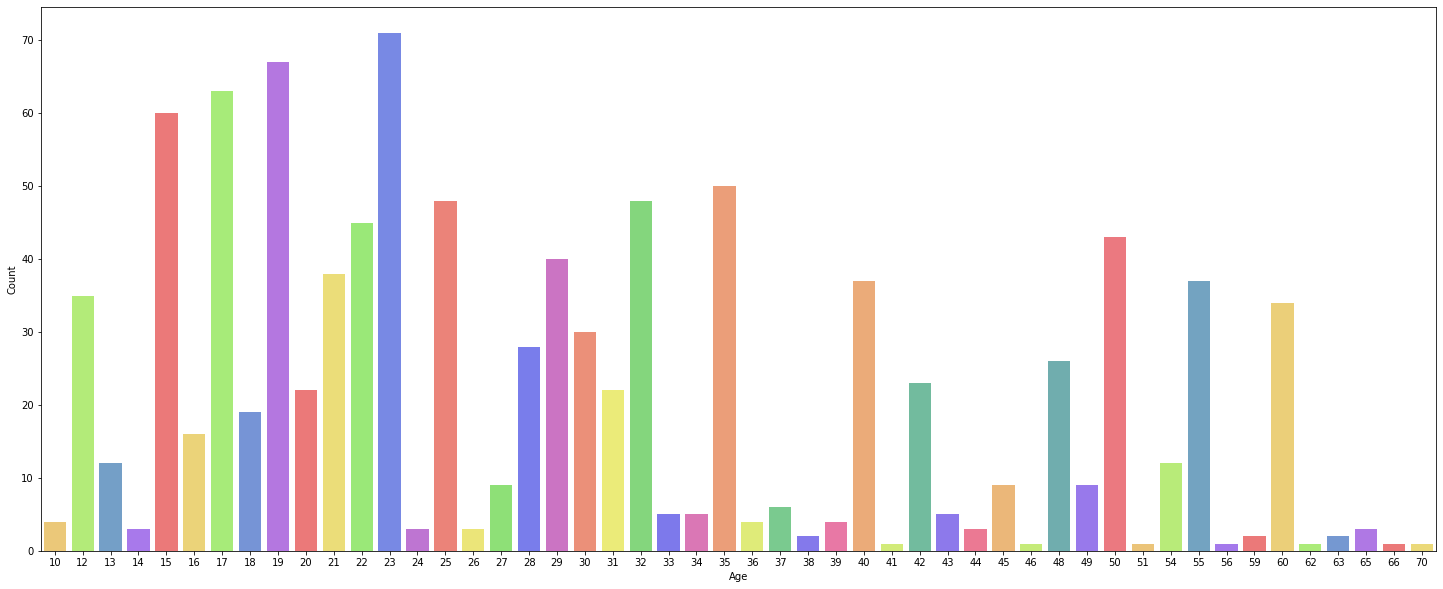

In [10]:
count = dataset['Age'].value_counts() # đếm tổng các độ tuổi
sns.set_context(font_scale=1.5)
plt.figure(figsize=(25,10)) # Kích thước của biểu đồ
sns.barplot(count.index, count.values, alpha=0.6, palette="prism") #alpha là độ trong suốt của biểu đồ
plt.ylabel('Count', fontsize=10) 
plt.xlabel('Age', fontsize=10)
plt.savefig("Age.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


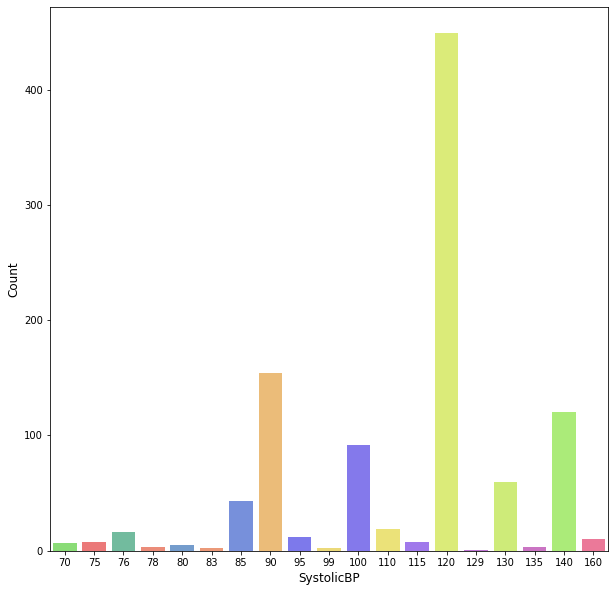

In [11]:
count = dataset['SystolicBP'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('SystolicBP', fontsize=12)
plt.savefig("SystolicBP.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


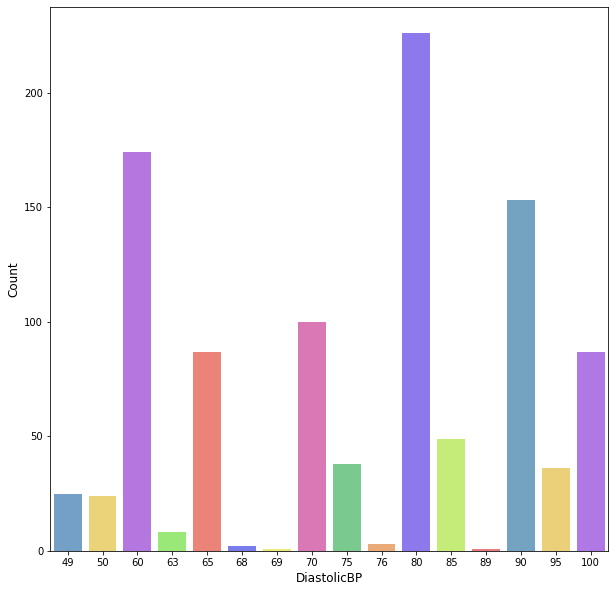

In [12]:
count = dataset['DiastolicBP'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('DiastolicBP', fontsize=12)
plt.savefig("DiastolicBP.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


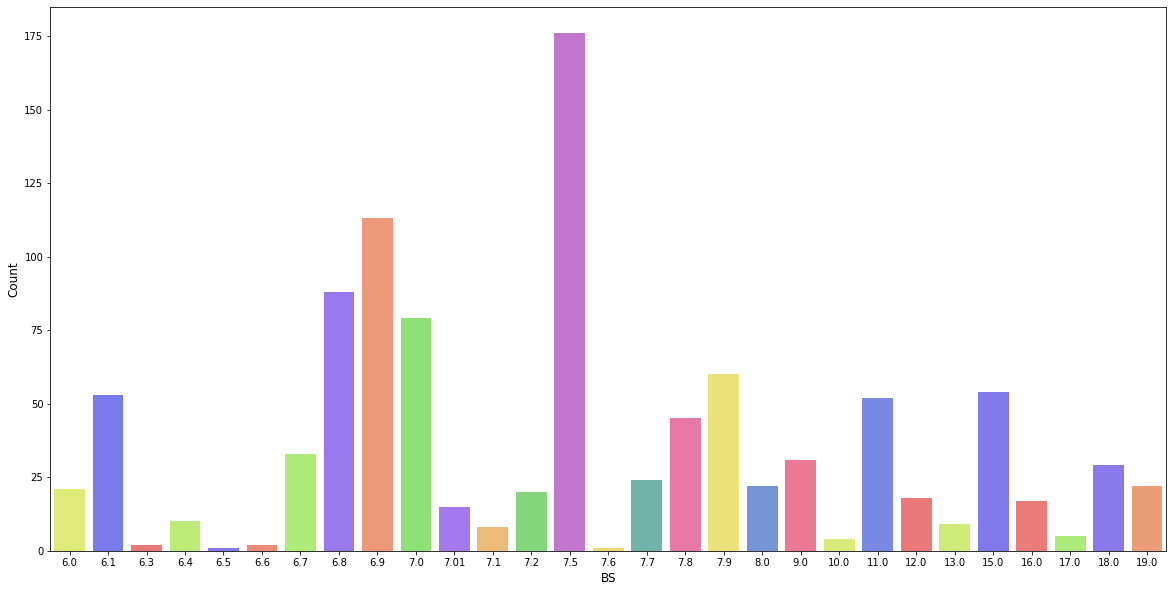

In [13]:
count = dataset['BS'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BS', fontsize=12)
plt.savefig("BS.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


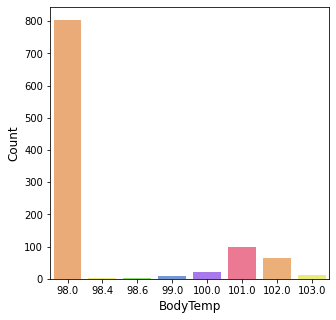

In [14]:
count = dataset['BodyTemp'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BodyTemp', fontsize=12)
plt.savefig("BodyTemp.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


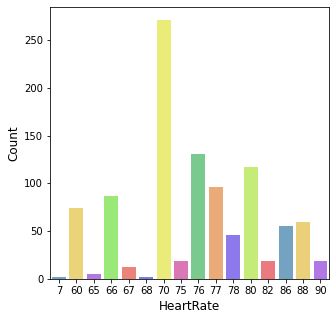

In [15]:
count = dataset['HeartRate'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('HeartRate', fontsize=12)
plt.savefig("HeartRate.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


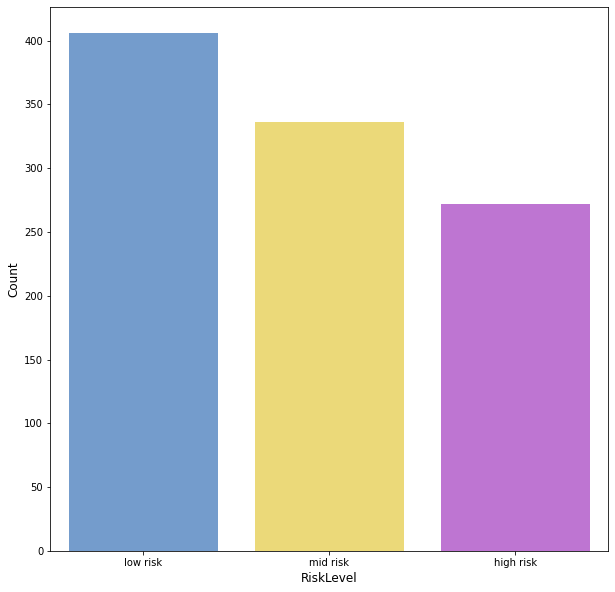

In [16]:
count = dataset['RiskLevel'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('RiskLevel', fontsize=12)
plt.savefig("RiskLevel.jpeg", format='jpeg', dpi=100)
plt.show()

In [17]:
 dataset['RiskLevel'].value_counts()


low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [18]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
labelencoder=LabelEncoder()
for column in dataset.columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])

In [19]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
mappings = list()
encoder = LabelEncoder()
for column in range(len(dataset.columns)):
    dataset[dataset.columns[column]] = encoder.fit_transform(dataset[dataset.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [20]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()  #Mã hóa các nhãn đích có giá trị từ 0 đến n_classes-1.

In [21]:
X = dataset.iloc[:,1:].values  #.iloc: Lập chỉ mục hoàn toàn dựa trên vị trí số nguyên để lựa chọn theo vị trí.
y = dataset.iloc[:,0].values
print(X)
print(y)

[[15 10 24  0 13  0]
 [17 13 23  0  6  0]
 [ 7  7 18  4 11  0]
 ...
 [ 6  2 28  0 13  0]
 [13 13 27  0  6  0]
 [13  4  0  5  8  2]]
[14 24 18 ... 24 32 21]


In [22]:
dataset.head() # trả về dữ liệu về 5 dòng đầu tiên

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,14,15,10,24,0,13,0
1,24,17,13,23,0,6,0
2,18,7,7,18,4,11,0
3,19,17,11,9,0,6,0
4,24,13,2,1,0,8,1


In [23]:
dataset.info() # in tóm tắt ngắn gọc về khung dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1014 non-null   int64
 1   SystolicBP   1014 non-null   int64
 2   DiastolicBP  1014 non-null   int64
 3   BS           1014 non-null   int64
 4   BodyTemp     1014 non-null   int64
 5   HeartRate    1014 non-null   int64
 6   RiskLevel    1014 non-null   int64
dtypes: int64(7)
memory usage: 55.6 KB


In [24]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=4) # phân loại cây quyết định(chiều sâu tối đa, số lượng mẫu tối thiểu)
decision_tree.fit(X,y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

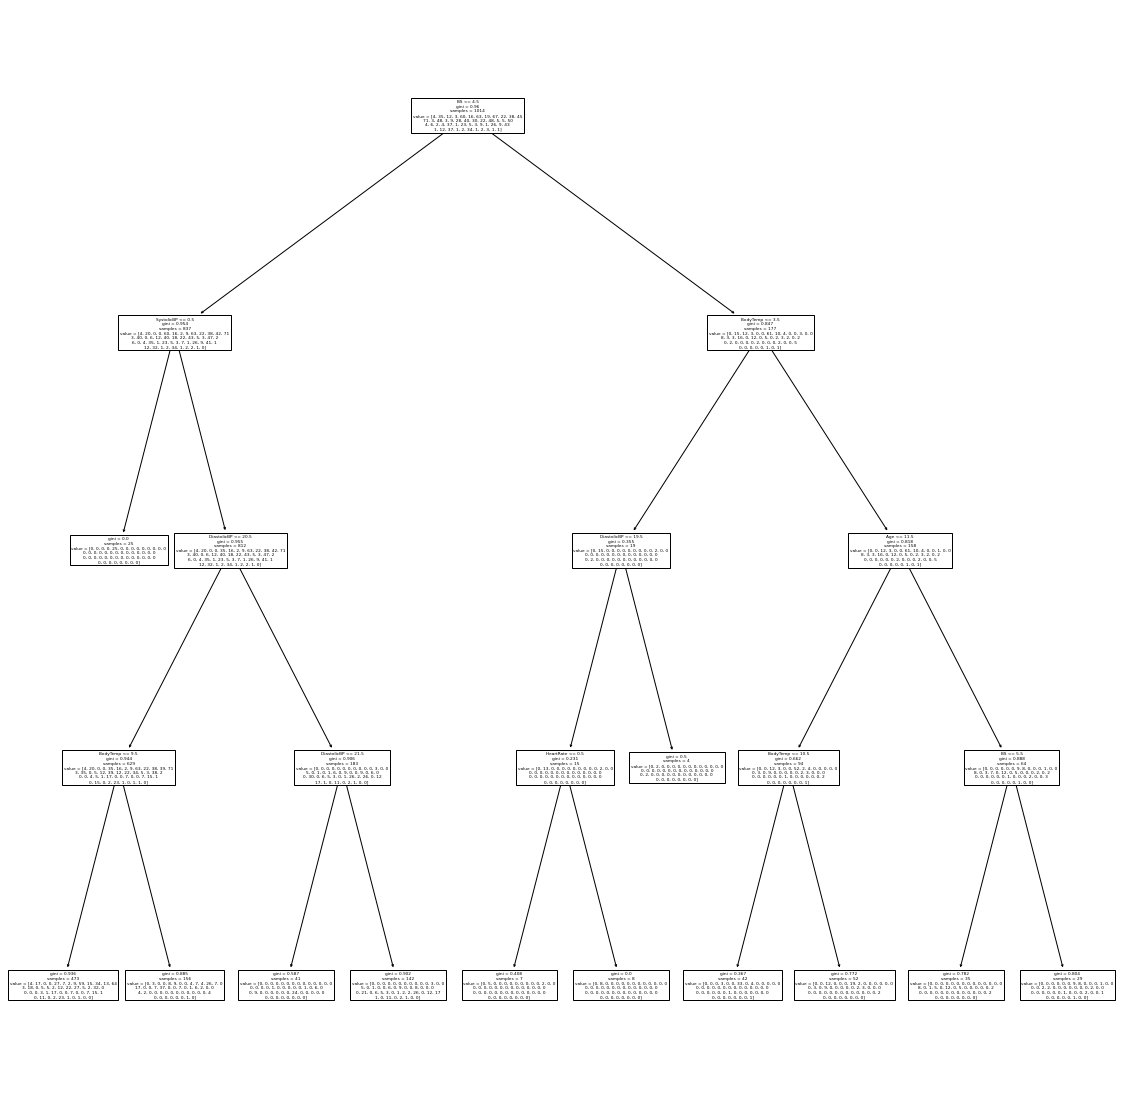

In [25]:
fig, axis = plt.subplots(figsize=(20,20))
tree.plot_tree(decision_tree, ax=axis, feature_names=['Age','SystolicBP','DiastolicBP',	'BS',	'BodyTemp',	'HeartRate',	'RiskLevel'])  #vẽ cây quyết định
plt.show()

In [26]:
#Xử lý dữ liệu để vẽ cây quyết định
X_dt = dataset.drop(['RiskLevel'], axis=1) #Xoá 1 cột "RiskLevel" và trả lại một đối tượng mới
Y = dataset["RiskLevel"]
print(y)
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=20, test_size=0.3) #train 70% - test 30%

[14 24 18 ... 24 32 21]


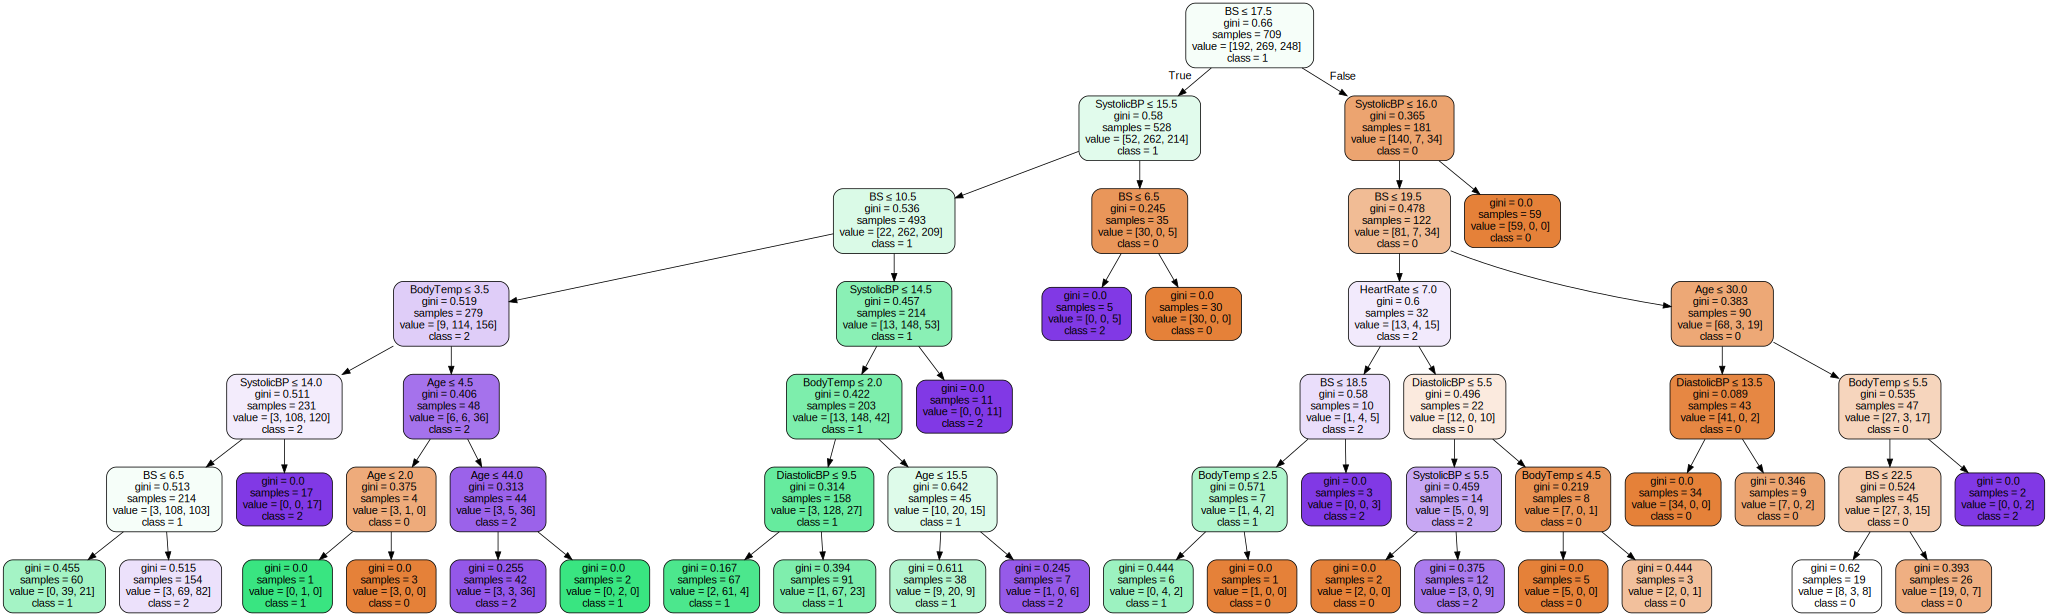

In [27]:
Y_name = ['0','1','2']
clf = DecisionTreeClassifier(max_depth = 6,random_state=1) # độ sâu lớn nhất của cây là 6
clf.fit(X_train_dt, Y_train_dt) 
Y_pred_dt = clf.predict(X_test_dt)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names=Y_name,
                         filled=True, rounded=True,
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render(filename='DecisionTree')
graph

In [28]:
scores = cross_val_score(decision_tree, X, y, cv=5)
tb_scores = np.mean(scores)
print(tb_scores)

0.24950982783007367


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler() # làm cho dữ liệu nhỏ lại để khớp và dễ kiểm soát

In [31]:
scaler_X = scaler.fit_transform(dataset) #tính giá trị trung bình và phương sai

In [32]:
scaler_X

array([[-0.35157219,  0.89699358,  0.37335201, ..., -0.49948092,
         1.43791694, -1.37751234],
       [ 0.44435146,  1.42626415,  1.02607433, ..., -0.49948092,
        -0.48526648, -1.37751234],
       [-0.03320273, -1.22008873, -0.2793703 , ...,  1.3574344 ,
         0.88843596, -1.37751234],
       ...,
       [ 0.44435146, -1.48472402, -1.36724082, ..., -0.49948092,
         1.43791694, -1.37751234],
       [ 1.08109038,  0.367723  ,  1.02607433, ..., -0.49948092,
        -0.48526648, -1.37751234],
       [ 0.20557436,  0.367723  , -0.93209261, ...,  1.82166323,
         0.06421449,  1.21394872]])

Correlation Between Spending Categories


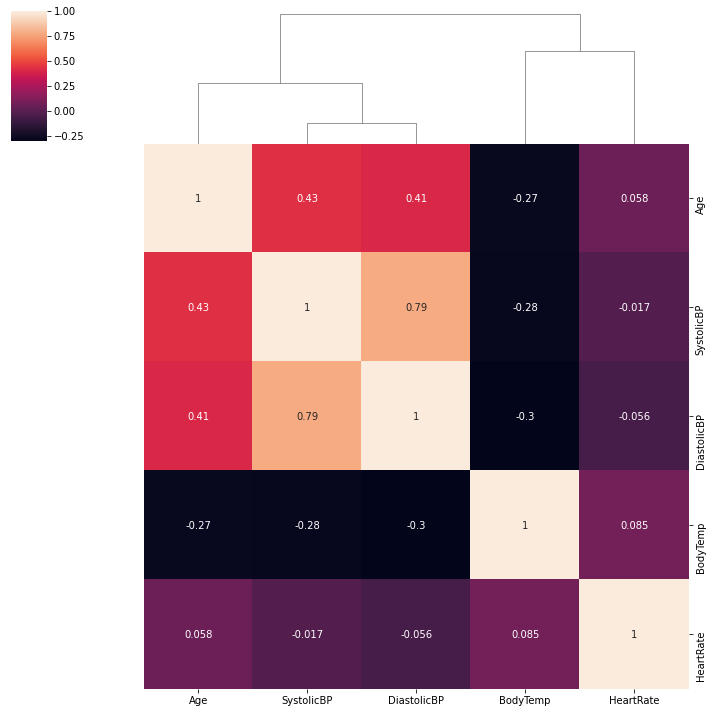

In [33]:
print('Correlation Between Spending Categories') 
sns.clustermap(data=dataset.drop(['BS','RiskLevel'], axis=1).corr(), annot=True, row_cluster=False); #xem sự tương quan giữa điểm dữ liệu, càng gần 1 thì sự tương quan càng cao 

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
number_of_outliers = []
percentage_of_outliers = []

# min_samples điểm khởi đầu: 2 * no.of dimension()
min_samples = 2 * scaler_X.shape[1]

for eps in np.linspace(0.001,3,50): # Vòng lặp eps từ 0.001 tới 3 và tạo ra 50 mẫu trong phạm vi từ 0.001 tới 3
  #khởi tạo model
  dbscan = DBSCAN(eps = eps , min_samples= min_samples)
  dbscan.fit(scaler_X) 

# Number of clusters (số lượng cụm)
  number_of_outliers.append(np.sum(dbscan.labels_==-1))

# Percentage of points classified as outlies (tính phần trăm)
  perc_outliers = 100 * np.sum(dbscan.labels_==-1) / len(dbscan.labels_)
  percentage_of_outliers.append(perc_outliers)

Text(0, 0.5, 'Percentage of Outliers')

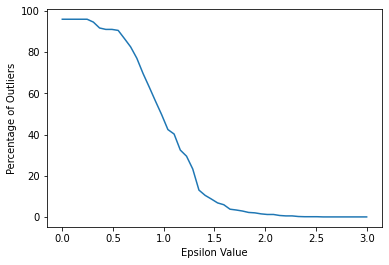

In [36]:
sns.lineplot(x=np.linspace(0.001,3,50), y=percentage_of_outliers) # xem eps(Epsilon) chạy như nào (xem có sai số hay ko )
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Outliers")

In [37]:
min_samples = 2 * scaler_X.shape[1] # tính giá trị tb mẫu
dbscan = DBSCAN(eps=2,min_samples=min_samples)


In [38]:
dbscan.fit(scaler_X) 

DBSCAN(eps=2, min_samples=14)

In [39]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

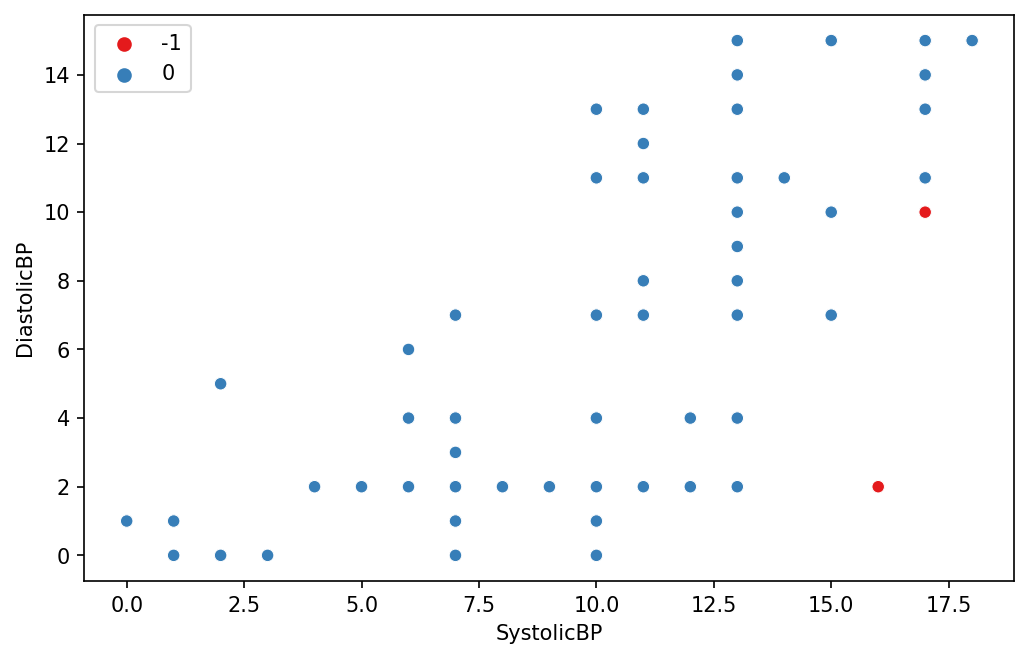

In [40]:
plt.figure(figsize=(8,5), dpi=150) 
sns.scatterplot(data = dataset, x='SystolicBP',y='DiastolicBP', hue=dbscan.labels_, palette='Set1')  # vẽ dbscan

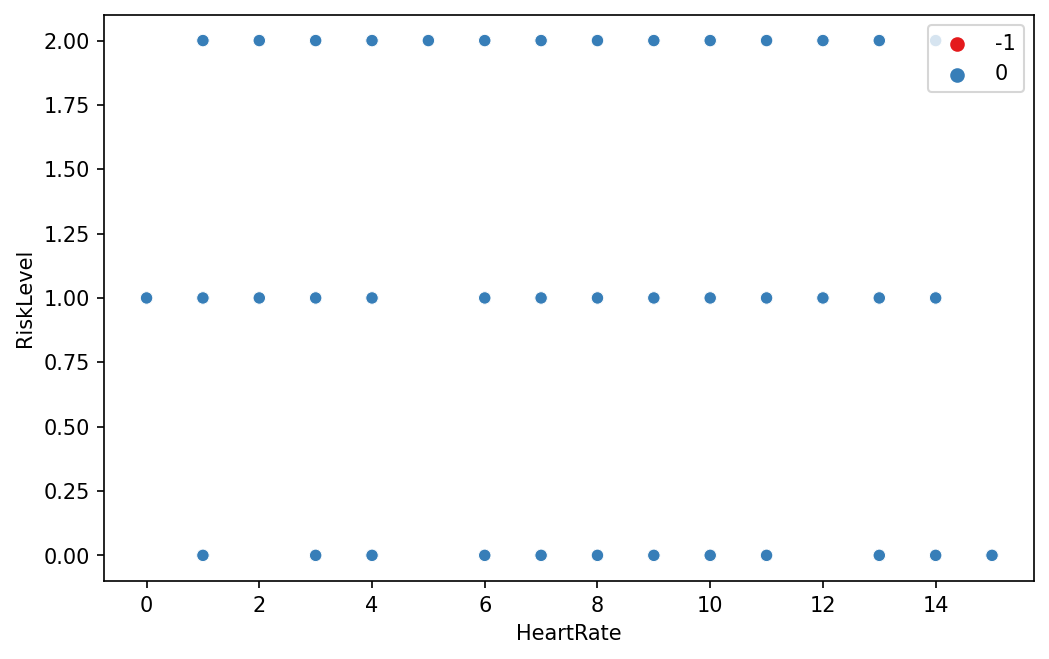

In [41]:
plt.figure(figsize=(8,5), dpi=150)
sns.scatterplot(data = dataset, x='HeartRate',y='RiskLevel', hue=dbscan.labels_, palette='Set1') # vẽ dbscan